# Exercice 2

In [1]:
using Pkg
Pkg.add("Distributions")
Pkg.add("Plots")

using Distributions

   Resolving package versions...
  No Changes to `C:\Users\Ponts\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Ponts\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ponts\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Ponts\.julia\environments\v1.9\Manifest.toml`


In [2]:
#Parameters
p_t = [0.2 0.2 0.4 0.4 0.7 0.7 0.2 0.2 0.8 0.8 0.5 0.5 0.2 0.2]
n = 10
function cost(stock)
    return 0.1*stock
end
function iter(stock, order, demand)
    if stock + order - demand < 0
        return 0
    end
    return stock + order - demand
end
function gain(demand, stock, order)
    if stock + order - demand < 0
        return (stock + order) * 3
    end
    return 3*demand
end
function command(order)
    return order
end
function action(stock)
    return [stock stock + 1 stock + 2 stock + 3 stock + 4 stock + 5]
end

action (generic function with 1 method)

## Simulateur ##
Il faut considérer le premier jour où il n'y a pas de ventes, mais seulement une commande de la part du magasin; de même qu'il n'y a pas de commandes le dernier jour, mais des ventes. Le coût du stock est ensuite calculé chaque soir (le stock étant celui du matin - les ventes) \
On considère donc chaque journée en commençant par le soir de la veille et se finissant le soir.

In [3]:
function simulator(policy, stock_ini)
    Liste = []
    for j in 1:1000
        #Simulate the policy
        #return the cost associated with the policy with a 95% confidence interval
        stock = stock_ini
        total_gain = 0
        for t in 1:14 #t is the period
            order = policy[stock + 1, t]
            demand = rand(Binomial(10, p_t[t]))
            stock = iter(stock, order, demand)
            total_gain += gain(demand, stock, order) - cost(stock) - command(order)
        end
        total_gain -= cost(stock)
        push!(Liste, total_gain)
    end
    return mean(Liste), [mean(Liste) - 1.96*std(Liste)/sqrt(1000), mean(Liste) + 1.96*std(Liste)/sqrt(1000)]
end

simulator (generic function with 1 method)

## The suggested policy

In [4]:
policy = zeros(20, 14)
for s in 1:5
    for t in 1:14
        policy[s, t] = 5
    end
end
policy = round.(Int, policy)

20×14 Matrix{Int64}:
 5  5  5  5  5  5  5  5  5  5  5  5  5  5
 5  5  5  5  5  5  5  5  5  5  5  5  5  5
 5  5  5  5  5  5  5  5  5  5  5  5  5  5
 5  5  5  5  5  5  5  5  5  5  5  5  5  5
 5  5  5  5  5  5  5  5  5  5  5  5  5  5
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [5]:
C = simulator(policy, 10)
C

(74.0846000000001, [73.23952618115736, 74.92967381884283])

In [6]:
Q = zeros(21, 14, 6)

#Construct the value function for each state at each time
V = zeros(21,15)
for s in 0:20
    V[s + 1, 15] = 0.1*s
end

P = zeros(21, 14, 6, 21)
for s in 0:20
    for t in 1:14
        dist = Binomial(10, p_t[t])
        for a in 1:6
            for s_prime in 0:20
                P[s + 1, t, a, s_prime + 1] = pdf(dist, s - s_prime + a) #Probability to go from s to s_prime with action a at time t
            end
        end
    end
end

policy_markov = zeros(21, 14)
println(Q[1, 1, 1])

0.0


In [7]:
for t in 14:-1:1
    for s in 0:20
        V[s+1,t] = -100000
        for a in 0:5
            Q[s + 1,t,a + 1] = 0
            for s_prime in 0:20
                Q[s + 1, t, a + 1] += P[s + 1, t, a + 1, s_prime + 1]*(V[s_prime + 1, t+1] + 3 * (s - s_prime + a) - cost(s_prime) - command(a))
            end
            if Q[s + 1,t,a + 1] > V[s + 1,t]
                V[s + 1,t] = Q[s + 1,t,a + 1]
                policy_markov[s + 1,t] = a
            end
        end
    end
end
policy_markov = round.(Int, policy_markov)
for row in eachrow(policy_markov)
    println(row)
end
println(V[11, 1])

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 2]
[4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 1]
[3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 0]
[2, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 0, 0]
[1, 3, 5, 5, 5, 5, 3, 5, 5, 5, 4, 3, 0, 0]
[0, 2, 5, 5, 5, 4, 2, 5, 5, 5, 3, 2, 0, 0]
[0, 1, 5, 5, 5, 3, 1, 5, 5, 5, 2, 1, 0, 0]
[0, 0, 4, 5, 5, 2, 0, 4, 5, 4, 1, 0, 0, 0]
[0, 0, 3, 4, 4, 1, 0, 3, 5, 3, 0, 0, 0, 0]
[0, 0, 2, 3, 3, 0, 0, 2, 4, 2, 0, 0, 0, 0]
[0, 0, 1, 2, 2, 0, 0, 1, 3, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
90.49886510001804


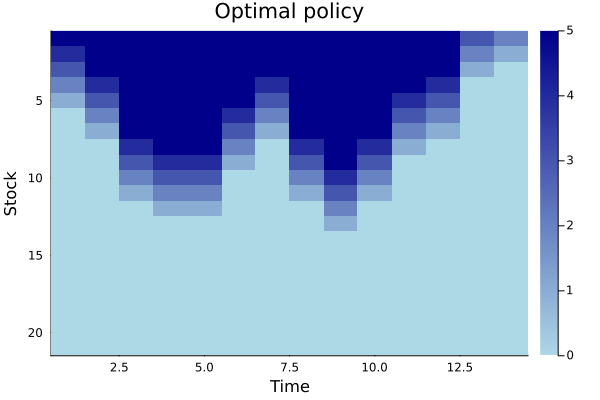

In [8]:
#print a heatmap of the policy
using Plots
heatmap(policy_markov, c=:blues, yflip=true, xlabel="Time", ylabel="Stock", title="Optimal policy")


In [9]:
C_markov = simulator(policy_markov, 10)
println(C_markov)

(99.48699999999991, [98.8320496635676, 100.14195033643222])


## Résultats ##
On voit tout d'abord que les résultats proposés par la programmation dynamique sont plus efficaces que ceux d'une politique au hasard.  
Cela indique déjà qu'il n'y a pas d'erreur grave.  
Ensuite, en regardant les résultats proposés, on peut voir que:  
-La politique ne commande pas beaucoup au début (puisqu'elle a déjà un bon stock)  
-Le magasin se pare aux prévisions optimistes et pessimistes en adaptant ses commandes (et donc le stock souhaité)  
-Le magasin ne commande pas beaucoup à la fin, puisque le stock va se perdre  

# Question 3 #

In [10]:
pro_96 = zeros(96)
for i in 1:96
    pro_96[i] = p_t[(i-1) % 14 + 1]
end

In [11]:
function simulator_96(policy, stock_ini)
    Liste = []
    for j in 1:1000
        #Simulate the policy
        #return the cost associated with the policy with a 95% confidence interval
        stock = stock_ini
        total_gain = 0
        for t in 1:96 #t is the period
            order = policy[stock + 1, t]
            demand = rand(Binomial(10, pro_96[t]))
            stock = iter(stock, order, demand)
            total_gain += gain(demand, stock, order) - cost(stock) - command(order)
        end
        total_gain -= cost(stock)
        push!(Liste, total_gain)
    end
    return mean(Liste), [mean(Liste) - 1.96*std(Liste)/sqrt(1000), mean(Liste) + 1.96*std(Liste)/sqrt(1000)]
end

simulator_96 (generic function with 1 method)

In [18]:
Q_96 = zeros(21, 96, 6)

#Construct the value function for each state at each time
V_96 = zeros(21, 97)


P_96 = zeros(21, 96, 6, 21)
for s in 0:20
    for t in 1:96
        dist = Binomial(10, pro_96[t])
        for a in 0:5
            for s_prime in 0:20
                P_96[s + 1, t, a + 1, s_prime + 1] = pdf(dist, s - s_prime + a + 1) #Probability to go from s to s_prime with action a at time t
            end
        end
    end
end

policy_markov_96 = zeros(21, 96)

21×96 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    

In [19]:
for t in 96:-1:1
    for s in 0:20
        V_96[s+1,t] = -100000
        for a in 0:5
            Q_96[s + 1, t, a + 1] = 0
            for s_prime in 0:20
                Q_96[s + 1, t, a + 1] += P_96[s + 1, t, a + 1, s_prime + 1]*(V_96[s_prime + 1, t + 1] + 3 * (s - s_prime + a) - cost(s_prime) - command(a))
            end
            if Q_96[s + 1, t, a + 1] > V_96[s + 1, t]
                V_96[s + 1, t] = Q_96[s + 1, t, a + 1]
                policy_markov_96[s + 1, t] = a
            end
        end
    end
end
policy_markov_96 = round.(Int, policy_markov_96)
println(V_96[1, 1])

563.1752329378457


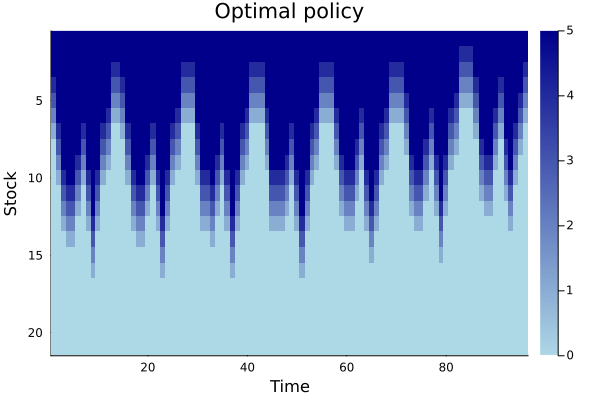

In [20]:
heatmap(policy_markov_96, c=:blues, yflip=true, xlabel="Time", ylabel="Stock", title="Optimal policy")

In [21]:
C_markov_96 = simulator(policy_markov_96, 10)
println(C_markov_96)

(108.26069999999999, [107.66975987714149, 108.85164012285848])


##### 3.b)
On considère de même que l'on peut commencer les commandes dès la veille du premier jour au soir.  
Les journées sont donc:  
-commande  
-réception de la commande d'il y a 2 jours  
-vente


In [24]:
function simulator_2d(policy, stock_ini)
    Liste = []
    for j in 1:1000
        #Simulate the policy
        #return the cost associated with the policy with a 95% confidence interval
        stock = stock_ini
        total_gain = 0
        last_order = 0
        for t in 1:14
            #the order will depend of the day (the demand expected), the stock and the demand from the previous day
            order = policy[stock + 1, last_order + 1, t]
            demand = rand(Binomial(10, p_t[t]))
            stock = iter(stock, last_order, demand)
            total_gain += gain(demand, stock, last_order) - cost(stock) - command(order)
            last_order = order
        end
        total_gain -= cost(stock)
        push!(Liste, total_gain)
    end
    return mean(Liste), [mean(Liste) - 1.96*std(Liste)/sqrt(1000), mean(Liste) + 1.96*std(Liste)/sqrt(1000)]
end

simulator_2d (generic function with 1 method)

In [26]:
Q_2d = zeros(21, 14, 6)

#Construct the value function for each state at each time
V_2d = zeros(21, 14)


P_2d = zeros(21, 14, 6, 21)
#P(s_prime knowing s and a at time t)
for s in 0:20
    for t in 1:14
        dist = Binomial(10, p_t[t])
        for a in 0:5
            for s_prime in 0:20
                P_2d[s + 1, t, a + 1, s_prime + 1] = pdf(dist, s - s_prime + a) #Probability to go from s to s_prime with action a at time t
            end
        end
    end
end
policy_markov_2d = zeros(21, 21, 14, 6)
policy_markov_2d[1, 1, 1, 1]

0.0

In [ ]:
#Dynamic programming, we have to be careful with the indexation
policy_markov_2d = zeros(21, 21, 14, 6)
